## Part 1 - Plotting

<IPython.core.display.Javascript object>


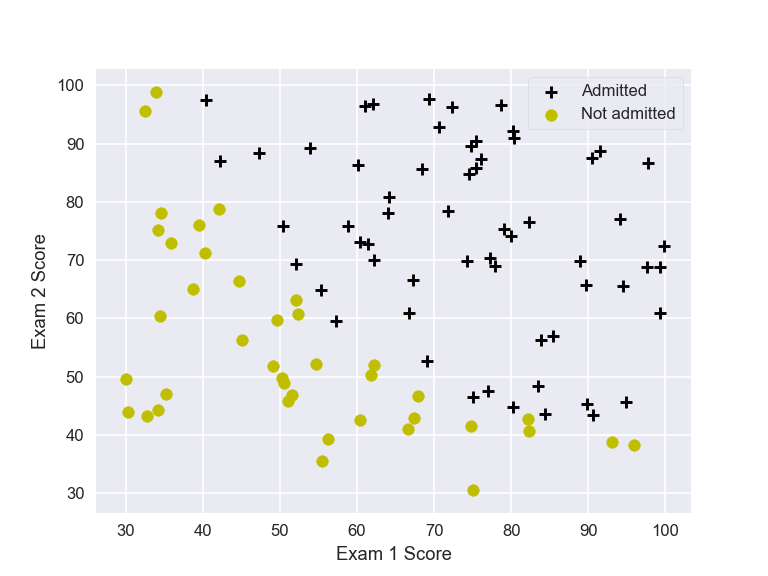

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

# ignore warnings
warnings.filterwarnings('ignore')

# set numpy print options
np.set_printoptions(suppress=True)

# set default figure size and matplotlib figure format
matplotlib.rcParams["figure.dpi"] = 120
%matplotlib notebook

# load data
data = np.loadtxt("data/ex2data1.txt", delimiter=',')
m, n = data[:, :-1].shape
X = np.concatenate((np.ones((m, 1)), data[:, :-1]), axis=1)
y = data[:, -1]

# plot data


def plotData(data, xlabel, ylabel, poslabel, neglabel):
    """
    Plots the data points with + for the positive examples and 
    o for the negative examples. Data is assumed to be an Mx3 array.

    :param data: an Mx3 array
    :param xlabel: label for the x-axis
    :param ylabel: label for the y-axis
    :param poslabel: label for the positive (y == 1) examples
    :param poslabel: label for the negative (y == 0) examples
    """
    plt.scatter(data[data[:, -1] == 1, 0], data[data[:, -1] ==
                1, 1], color='k', marker='+', label=poslabel)
    plt.scatter(data[data[:, -1] == 0, 0], data[data[:, -1] ==
                0, 1], color='y', marker='o', label=neglabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper right", frameon=True, fancybox=True)
    plt.show()


plotData(data, "Exam 1 Score", "Exam 2 Score", "Admitted", "Not admitted")

## Part 2 - Cost Function and Gradient

### Sigmoid function

In [3]:
def sigmoid(z):
    """
    Computes the sigmoid function for all values of z.
    
    :param z: scalar, vector or array of values for which the sigmoid function should be computed
    :returns: scalar, vector or array of values of size z containing computed sigmoid values
    """
    return (1 / (1 + np.power(np.e, -z)))

### Cost function and gradient

In [4]:
def costFunction(theta, X, y):
    """ 
    Computes the cost of using theta as the parameter for logistic regression and the
    gradient of the cost w.r.t. to the parameters
    
    :param theta: parameter vector containing corresponding values of theta
    :param X: MxN array that contains feature set (x-values)
    :param y: Mx1 array that contains resulting outcomes (y-values)
    :returns: a scalar of the cost "J" and gradient "grad" of the cost with the same size as theta
    """
    m = len(y)
    h = sigmoid(np.dot(X, theta))  # get predictions
    J = -(1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))  # calculate cost
    
    return J

In [5]:
def gradient(theta, X, y):
    """
    Computes the gradient of the cost with respect to cost J and theta.
    
    :param theta: parameter vector containing corresponding values of theta
    :param X: MxN array that contains feature set (x-values)
    :param y: Mx1 array that contains resulting outcomes (y-values)
    :returns: gradient of the cost with the same size as theta
    """
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    return (1 / m) * np.dot(X.transpose(), h - y)

In [6]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print("\n")
print('Gradient: \n', grad)

Cost: 
 0.69314718056


Gradient: 
 [ -0.1        -12.00921659 -11.26284221]


### Optimization using SciPy

In [7]:
# Minimizes the cost function using the scipy.optimize.minimize function
res = minimize(costFunction, initial_theta, args=(X, y),
               method=None, jac=gradient, options={'maxiter': 400})
print("Cost at theta found by minimize: \n", res.fun)
print("\n")
print("Theta: \n", res.x)

Cost at theta found by minimize: 
 0.20349770158944375


Theta: 
 [-25.16133284   0.2062317    0.2014716 ]


### Predict using new data

In [8]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    
    :param theta: parameter vector containing corresponding values of theta
    :param X: MxN array that contains feature set (x-values)
    :returns: Mx1 array with predicted values of y
    """
    threshold = 0.5
    p = sigmoid(np.dot(X, theta)) >= threshold
    return (p.astype("int"))

In [9]:
theta = res.x
p = predict(theta, X)
print('Train accuracy {}%'.format(100 * sum(p == y.ravel()) / p.size))

Train accuracy 89.0%


### Plot decision boundary

<IPython.core.display.Javascript object>


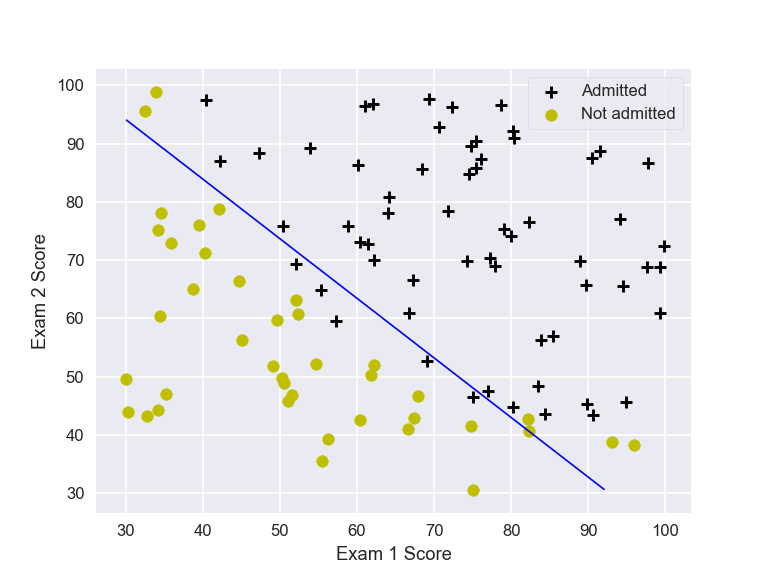

In [15]:
plotData(data, "Exam 1 Score", "Exam 2 Score", "Admitted", "Not admitted")
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((X1.ravel().shape[0],1)), X1.ravel(), X2.ravel()].dot(res.x))
h = h.reshape(X1.shape)
plt.contour(X1, X2, h, [0.5], linewidths=1, colors='b');

## Part 3 - Regularized Logistic Regression

<IPython.core.display.Javascript object>


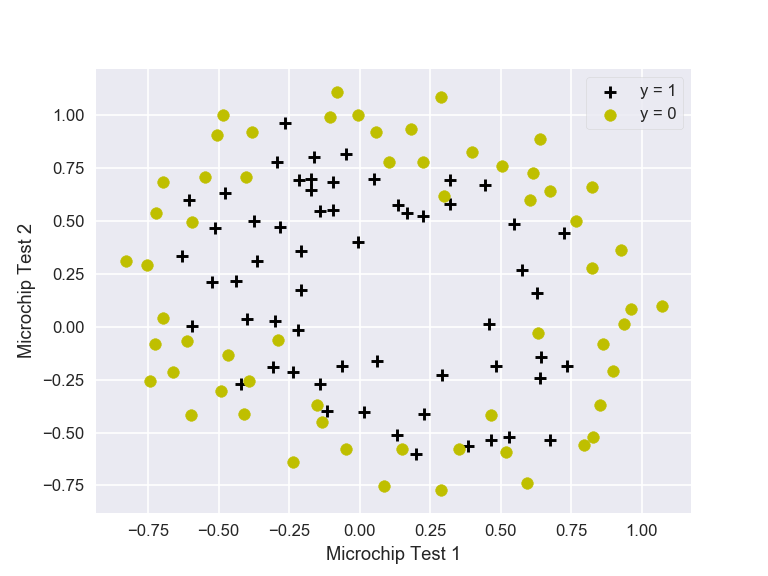

In [64]:
# load data
data2 = np.loadtxt("data/ex2data2.txt", delimiter=',')
m, n = data2[:, :-1].shape
X = data2[:, :-1]
y = np.c_[data2[:,2]]

# plot data
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

### Generate polynomial features

In [90]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:, :-1])
XX.shape

(118, 28)

### Regularized cost function

In [91]:
def costFunctionReg(theta, X, y, lamda=0.1):
    """polynomial
    Computes the cost of using theta as the parameter for logistic regression and the gradient of the cost w.r.t. to the parameters

    :param theta: parameter vector containing corresponding values of theta
    :param X: MxN array that contains feature set (x-values)
    :param y: Mx1 array that contains resulting outcomes (y-values)
    :param lamda: regularization parameter
    :returns: a scalar of the cost "J"
    """
    m = len(y)
    h = sigmoid(np.dot(X, theta))  # get predictions
    regTerm = (float(lamda) / 2) * theta**2
    cost = -(1 / m) * (np.log(h).T.dot(y) +
                       np.log(1 - h).T.dot(1 - y))  # calculate cost
    J = cost + (sum(regTerm[1:]) / m)

    return J

### Regularized gradient

In [92]:
def gradientReg(theta, X, y, lamda=0.1):
    """
    Computes the gradient of the cost with respect to cost J and theta.

    :param theta: parameter vector containing corresponding values of theta
    :param X: MxN array that contains feature set (x-values)
    :param y: Mx1 array that contains resulting outcomes (y-values)
    :param lamda: regularization parameter
    :returns: gradient of the cost with the same size as theta
    """
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    regTerm = float(lamda) * (theta / m)
    return (np.dot(X.transpose(), h - y) / m) + regTerm.T

In [93]:
initial_theta = np.zeros(X_.shape[1])
costFunctionReg(initial_theta, XX, y, 1)

0.69314718055994529